In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [2]:
# Define keys

consumer_key = '###########################'
consumer_secret = '#########################'
access_token = '###########################'
access_token_secret = '#####################'

In [3]:
# Authenticate

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
# Search for tweets

## New Search Criteria - Work ##Tweets

new_search = '#plumbing - filter:retweets'

##['#plumbing', '#plumber','#SharkBitePlumbing', ' #SharkBiteFittings',
##'#hvac', ' #contractor', ' #skilledtrades', ' #PEXpipe', ' #newconstruction']

date_since = '2019-06-01'

tweets = tw.Cursor(api.search,
                  q = new_search,
                  lang = 'en',
                  since = date_since).items(1000)


In [5]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


In [6]:
# Remove urls
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [7]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

In [8]:
# Download Stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ponshp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Remove stopwords from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
             for tweet_words in words_in_tweet]

In [10]:
# Remove collection words
collection_words = ['rt','plumbing']

tweets_nsw_nc = [[w for w in word if not w in collection_words]
                for word in tweets_nsw]


### Exploring co occuring words (Bigrams)

In [11]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

[('fivestarplumbs', 'main'),
 ('main', 'causes'),
 ('causes', 'low'),
 ('low', 'water'),
 ('water', 'pressure1too'),
 ('pressure1too', 'many'),
 ('many', 'appliances2'),
 ('appliances2', 'shutoff'),
 ('shutoff', 'valves3'),
 ('valves3', 'shower'),
 ('shower', 'heads'),
 ('heads', 'faucets'),
 ('faucets', 'clogged')]

In [13]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('magakb', 'check'), 52),
 (('shop', 'gt'), 40),
 (('metric', 'sizessee'), 39),
 (('sizessee', 'shop'), 39),
 (('gt', 'tools'), 39),
 (('tools', 'diy'), 39),
 (('linkedsupplyls', 'oring'), 35),
 (('high', 'grade'), 32),
 (('grade', 'rubberoring'), 32),
 (('rubberoring', 'kit'), 32),
 (('kit', 'metric'), 32),
 (('oring', 'kit'), 27),
 (('kit', 'high'), 27),
 (('check', 'maga'), 24),
 (('click', 'link'), 23),
 (('engineer', 'engineering'), 18),
 (('engineering', 'hydraulics'), 18),
 (('hydraulics', 'plumber'), 18),
 (('plumber', 'london'), 18),
 (('london', 'uk'), 18)]

In [15]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                        columns = ['bigram', 'count'])

bigram_df

,bigram,count
0,"(magakb, check)",52
1,"(shop, gt)",40
2,"(metric, sizessee)",39
3,"(sizessee, shop)",39
4,"(gt, tools)",39
5,"(tools, diy)",39
6,"(linkedsupplyls, oring)",35
7,"(high, grade)",32
8,"(grade, rubberoring)",32
9,"(rubberoring, kit)",32


In [16]:
# visualize networks of bigrams

# create dictionary of bigrams and their counts

d = bigram_df.set_index('bigram').T.to_dict('records')

In [17]:
d

[{('check', 'maga'): 24,
  ('click', 'link'): 23,
  ('engineer', 'engineering'): 18,
  ('engineering', 'hydraulics'): 18,
  ('grade', 'rubberoring'): 32,
  ('gt', 'tools'): 39,
  ('high', 'grade'): 32,
  ('hydraulics', 'plumber'): 18,
  ('kit', 'high'): 27,
  ('kit', 'metric'): 32,
  ('linkedsupplyls', 'oring'): 35,
  ('london', 'uk'): 18,
  ('magakb', 'check'): 52,
  ('metric', 'sizessee'): 39,
  ('oring', 'kit'): 27,
  ('plumber', 'london'): 18,
  ('rubberoring', 'kit'): 32,
  ('shop', 'gt'): 40,
  ('sizessee', 'shop'): 39,
  ('tools', 'diy'): 39}]

In [21]:
# create network plot
G = nx.Graph()
%matplotlib inline

In [25]:
# create connections between nodes

for k,v in d[0].items():
    G.add_edge(k[0],k[1],weight = (v*10))

In [26]:
G.add_node('reliance',weight = 100)

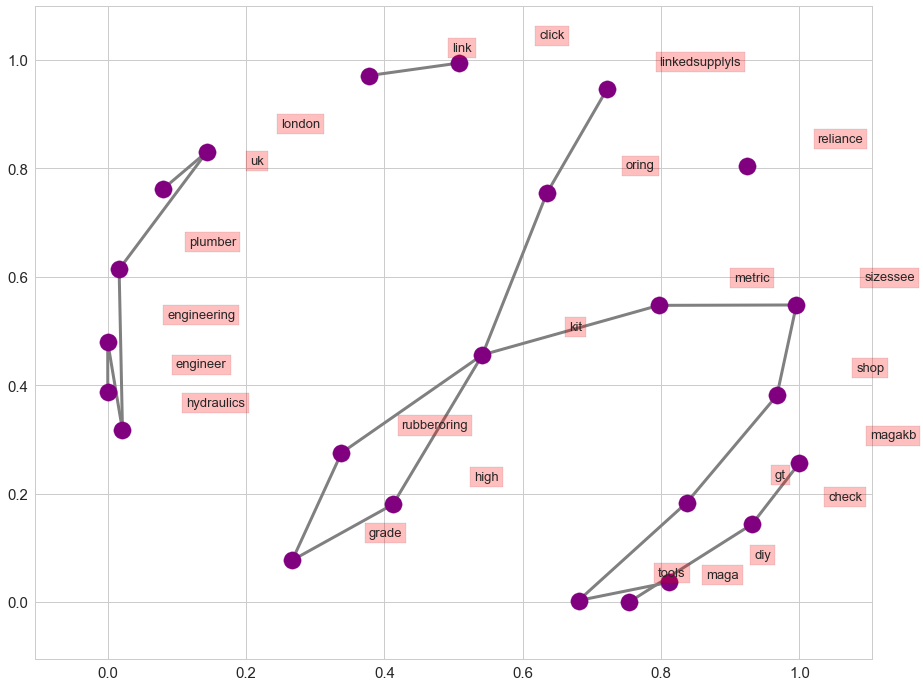

In [29]:
fig, ax = plt.subplots(figsize=(15, 12))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()
